## Customer Churn Analysis Case Study

Customer Churn rate is the percentage of customers stopping their interactions with a business over a given period of time. In this case of Banking informaion, since a lows customer retention rate decreases company profitability, we would like to analyze churn rate to determine specific at-risk factors that can cause churn rate.

I will explore the following questions: 
   - Does age affect churn rate?
   - Does tenure affect churn rate?
   - Does Churn Rate differ significantly between card types?
   - Would a customer that is active and complains less have low churn rates?
   - Would a customer that is active with good credit scores have low churn rates?
   - Does Number of Products sold affect churn rate?
   - Are there geographial differences in each countries' churn rates?

Later, we will try to nuild predictive models classifying if customer has 'churned' or exited.

### EDA
Understanding Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
cust_churn_df = pd.read_csv(r'C:\Users\cecil\OneDrive\Desktop\Projects\data\Customer-Churn-Records.csv')
cust_churn_df.head()
# cust_churn_df.loc[0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
"""""
Summary Statistics of Data
"""""
cust_churn_df.dtypes
cust_churn_df['CustomerId'] = cust_churn_df['CustomerId'].astype(str)

#Each df row is a unique customer
cust_churn_df.shape
cust_churn_df['CustomerId'].nunique()

10000

In [7]:
cust_churn_df.dtypes

RowNumber               int64
CustomerId             object
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [8]:
cust_churn_df = cust_churn_df.drop(['RowNumber', 'Surname'],axis=1)

cust_churn_summmary = cust_churn_df.loc[:, ~cust_churn_df.columns.isin(['CustomerId', 'Exited', 'isActiveMember', 'Complain', 'HasCrCard'])].describe()
cust_churn_summmary.loc[['mean', '25%', '50%', '75%']]

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned
mean,650.5288,38.9218,5.0128,76485.889288,1.5302,0.5151,100090.239881,3.0138,606.5151
25%,584.0000,32.0000,3.0000,0.000000,1.0000,0.0000,51002.110000,2.0000,410.0000
50%,652.0000,37.0000,5.0000,97198.540000,1.0000,1.0000,100193.915000,3.0000,605.0000
75%,718.0000,44.0000,7.0000,127644.240000,2.0000,1.0000,149388.247500,4.0000,801.0000


#### Data Preprocessing

In [9]:
#Looking at Nulls
cust_churn_df.isna().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### Feature Engineering

In [10]:
#Create Credit Score Rating Column

lowest_quantile = cust_churn_df["CreditScore"].quantile(q=.25)
med_quantile = cust_churn_df["CreditScore"].quantile(q=.50)
high_quantile = cust_churn_df["CreditScore"].quantile(q=.75)
best_quantile = cust_churn_df["CreditScore"].quantile(q=.85)

def creditScoreRating(score):
    if  score <= lowest_quantile:
        return "Bad"
    
    elif score <= med_quantile:
        return "Poor"
    
    elif score <= high_quantile:
        return "Good"
    
    elif score > high_quantile and score >= best_quantile:
        return "Excellent"
    else:
        return "Excellent"
    

cust_churn_df["CreditRating"] = cust_churn_df["CreditScore"].apply(creditScoreRating)
cust_churn_df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditRating
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Poor
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Poor
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Bad
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent


In [11]:
#Checking if there are Null Values for Credit Rating
#Null Values from Credit Score
cust_churn_df['CreditRating'].isna().sum()
cust_churn_df.loc[cust_churn_df['CreditRating'].isna()]["CreditScore"].value_counts()

Series([], Name: count, dtype: int64)

In [12]:
# import pandas as pd
# cust_churn_df.to_csv(r'C:\Users\cecil\OneDrive\Desktop\Projects\data\Customer Churn.csv')

#### Some visualizations

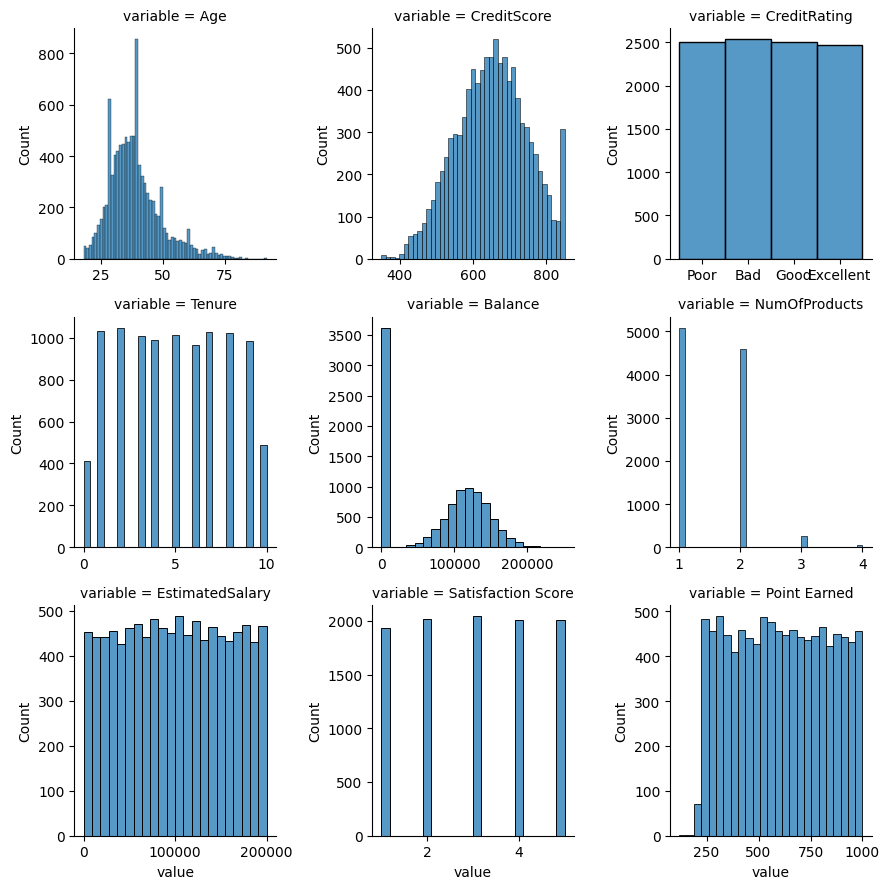

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#For Continuous Variables
cust_churn_col = ['Age', 'CreditScore', 'CreditRating', 'Tenure', 'Balance', 'NumOfProducts',     
                                                'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Create a facet grid
grid = sns.FacetGrid(cust_churn_df[cust_churn_col].melt(), col="variable", col_wrap=3, sharex=False, sharey=False)

# Map barplot onto the facet grid
grid.map(sns.histplot, "value")

plt.tight_layout()
plt.show()

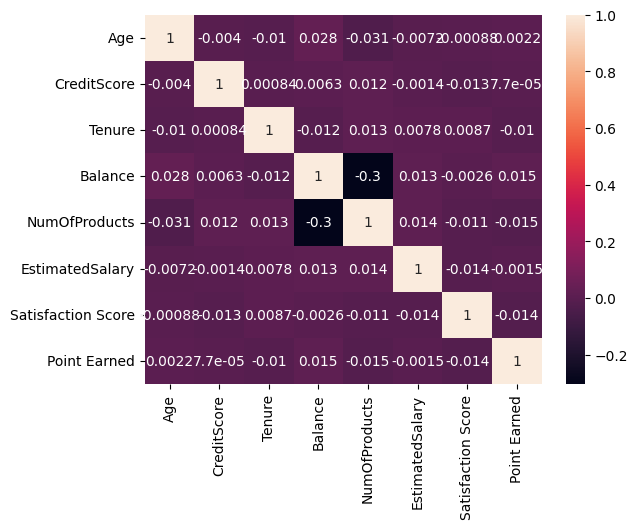

In [46]:
import seaborn as sns

corr_cust_churn_col = ['Age', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts',     
                                                'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Compute the correlation matrix
corr_matrix = cust_churn_df[corr_cust_churn_col].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True)

# Show plot
plt.show()

### Summary Analysis
After preprocessing our data, we delved into using Tableau to create visualizations and draw insights on the causes of customer churn rate. These are observations from our inital questions: 
    
- Does age affect churn rate?
- Does tenure affect churn rate?
- Does Churn Rate differ significantly between card types throughout tenure?
- Would a customer that is active and complains less have low churn rates?
- Would a customer that is active with good credit scores have low churn rates?
- Does Number of Products sold affect churn rate?
- Are there geographial differences in each countries' churn rates?

We notice that those around middle age(45-55 range) have the highest churm rates.

Tenure does not affect churn rate and is relatively stable throughout the tenure years.

We notice that the diamond card type has higher churn rates relative to the others throughout the tenure years. For customers with under 7 years of tenure, The gold card has the lowest churn rates.

Active customers who don't complain have a 0% churn rate and remain with the bank.

Active customers have lower churn rates across the different credit score ratings. The churn rates are simmilar however around 11-15%. This contradicts our expectation that people with excellent credit scores will continue remaining.

Churn rate increases drastically when 3+ prodcts are sold to them. This might be because of customer sentiment when innudated with multiple marketing of products.

Yes, Germany has a higher relative churn rate compared to France and Spain.


